In [2]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, select

In [27]:
%matplotlib inline
from matplotlib import style, pyplot
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [7]:
# Get all Measurement Data
# result = engine.execute('SELECT * FROM '
#                         '"Measurement"')
# for _r in result:
#     print(_r)

## D1: Determine the Summary Statistics for June

In [8]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

session.query(func.count(Measurement.date)).all()
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
date_str = "06"
temps = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == date_str).all()
# temps

In [9]:
#  3. Convert the June temperatures to a list.
junetemps = list(np.ravel(temps))

# junetemps = [seq[0] for seq in temps ]
# junetemps

In [10]:
#4. Create a DataFrame from the list of temperatures for the month of June. 
junetemps_df = pd.DataFrame(junetemps, columns=['June Temps'])

# junetemps_df

In [11]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
junetemps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [12]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
date_str1 = "12"
temps1 = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == date_str1).all()

In [13]:
# 7. Convert the December temperatures to a list.
# dectemps = session.query(Measurement.date, Measurement.tobs).\
#     filter(func.strftime("%m", Measurement.date) == date_str1).all()
# dectemps

dectemps = list(np.ravel(temps1))

# dectemps = [seq[0] for seq in temps ]
# dectemps

In [14]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dectemps_df = pd.DataFrame(dectemps, columns=['December temps'])

# dectemps_df

In [15]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dectemps_df.describe()

,December temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Other Queries and Stat for June/December

In [16]:
# Get the precipitation data for June
date_str = "06"
precip = session.query(Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == date_str).all()
# precip

juneprecip = list(np.ravel(precip))
# juneprecip

juneprecip_df = pd.DataFrame(juneprecip, columns=['June Precipt'])

juneprecip_df.describe()

,June Precipt
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [17]:
# Get the precipitation data for December
date_str1 = "12"
precip1 = session.query(Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == date_str1).all()
# precip

decprecip = list(np.ravel(precip1))
# juneprecip

decprecip_df = pd.DataFrame(decprecip, columns=['Dec Precipt'])

decprecip_df.describe()

,Dec Precipt
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


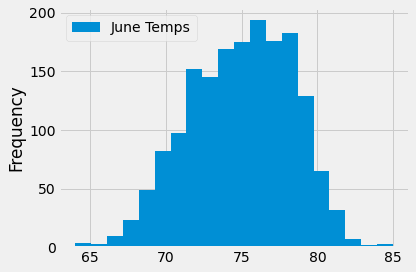

In [18]:
junetemps_df.plot.hist(bins=20)
plt.tight_layout()

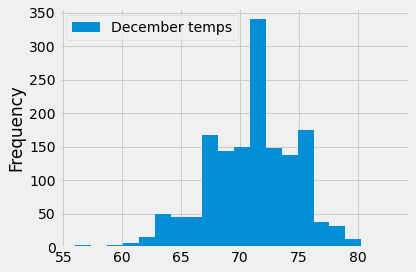

In [19]:
dectemps_df.plot.hist(bins=20)
plt.tight_layout()

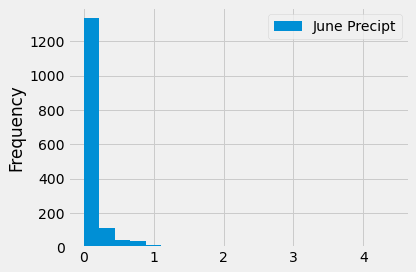

In [20]:
juneprecip_df.plot.hist(bins=20)
plt.tight_layout()

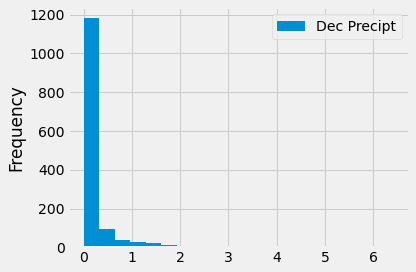

In [21]:
decprecip_df.plot.hist(bins=20)
plt.tight_layout()

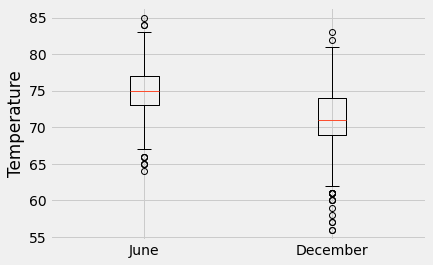

In [22]:
data = [junetemps, dectemps]

plt.boxplot(data)
plt.xticks([1, 2], ['June','December'])
plt.ylabel('Temperature')
plt.show()

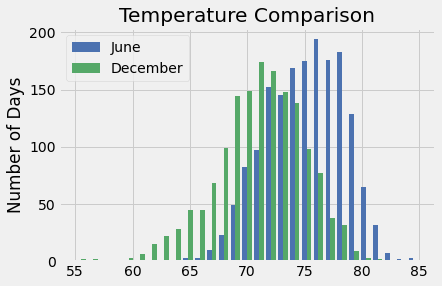

In [38]:
data = [junetemps, dectemps]

plt.style.use('seaborn-deep')

bins = np.linspace(55, 85, 30)

plt.hist([junetemps, dectemps], bins, label=['June', 'December'])
plt.legend(loc='upper left')
plt.ylabel('Number of Days')
plt.title('Temperature Comparison')
plt.show()

In [54]:
junres = [i for i in juneprecip if i]
decres = [i for i in decprecip if i]

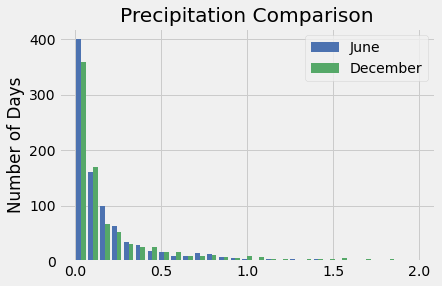

In [57]:
plt.style.use('seaborn-deep')

bins = np.linspace(0, 2, 30)

plt.hist([junres, decres], bins, label=['June', 'December'])
plt.legend(loc='upper right')
plt.ylabel('Number of Days')
plt.title('Precipitation Comparison')
plt.show()